In [ ]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Create a dataset of 300 patients with normal values
n = 300
df_outliers = pd.DataFrame({
    'patient_id': [f'P{i:04d}' for i in range(n)],
    'age': np.random.randint(20, 80, size=n),
    'bmi': np.round(np.random.normal(27, 4, size=n), 1),
    'cholesterol': np.round(np.random.normal(200, 30, size=n), 1),
    'systolic_bp': np.round(np.random.normal(120, 15, size=n), 1)
})

# Add 20 extreme BMI outliers (e.g., extremely obese cases)
bmi_outliers = pd.DataFrame({
    'patient_id': [f'OUT_BMI_{i}' for i in range(20)],
    'age': np.random.randint(20, 80, size=20),
    'bmi': np.random.uniform(80, 150, size=20),  # Massive BMI values
    'cholesterol': np.round(np.random.normal(200, 30, size=20), 1),
    'systolic_bp': np.round(np.random.normal(120, 15, size=20), 1)
})

# Add 20 extreme cholesterol outliers (e.g., very severe levels)
chol_outliers = pd.DataFrame({
    'patient_id': [f'OUT_CHOL_{i}' for i in range(20)],
    'age': np.random.randint(20, 80, size=20),
    'bmi': np.round(np.random.normal(27, 4, size=20), 1),
    'cholesterol': np.random.uniform(500, 1000, size=20),  # Insanely high
    'systolic_bp': np.round(np.random.normal(120, 15, size=20), 1)
})

# Combine all into one dataset
df_outliers = pd.concat([df_outliers, bmi_outliers, chol_outliers], ignore_index=True)

# Preview the data
df_outliers.head()


,patient_id,age,bmi,cholesterol,systolic_bp
0,P0000,58,25.0,199.6,114.8
1,P0001,71,30.7,223.9,123.0
2,P0002,48,33.8,191.6,98.5
3,P0003,34,30.5,150.1,128.7
4,P0004,62,27.0,199.8,97.1


In [ ]:

print("\n📋 Descriptive Stats:")
print(df_outliers[['bmi', 'cholesterol']].describe())





📋 Descriptive Stats:
              bmi  cholesterol
count  340.000000   340.000000
mean    32.568360   232.804560
std     20.407101   145.524371
min     17.200000   117.800000
25%     25.300000   179.500000
50%     27.900000   199.700000
75%     30.900000   224.125000
max    140.059038   962.837415
       cholesterol
count   340.000000
mean    232.804560
std     145.524371
min     117.800000
25%     179.500000
50%     199.700000
75%     224.125000
max     962.837415


In [ ]:

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

print("\n⚠️ BMI Outliers:")
print(detect_outliers_iqr(df_outliers['bmi']))

print("\n⚠️ Cholesterol Outliers:")
print(detect_outliers_iqr(df_outliers['cholesterol']))



⚠️ BMI Outliers:
300    134.320014
301    108.371713
302    122.129877
303    124.277837
304    106.099405
305    115.883064
306    108.912182
307     84.839295
308    110.601577
309     86.817537
310    108.351456
311    121.504288
312    120.559043
313    126.383490
314     86.668306
315    125.648627
316    101.850364
317    107.933216
318    140.059038
319     80.632128
Name: bmi, dtype: float64

⚠️ Cholesterol Outliers:
320    825.255824
321    882.595432
322    962.837415
323    719.086173
324    950.687825
325    938.945580
326    658.597858
327    934.450313
328    687.836126
329    648.434637
330    824.537329
331    664.190614
332    815.104374
333    804.915903
334    781.719464
335    690.209852
336    774.249861
337    798.242737
338    772.843444
339    722.209726
Name: cholesterol, dtype: float64


In [ ]:

# 📊 Original means (includes outliers)
mean_with_outliers = df_outliers[['bmi', 'cholesterol']].mean()

# 🧹 Remove outliers using the IQR method
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

# Create a filtered copy
df_cleaned = df_outliers.copy()
df_cleaned['bmi'] = remove_outliers_iqr(df_cleaned['bmi'])
df_cleaned['cholesterol'] = remove_outliers_iqr(df_cleaned['cholesterol'])

# 📉 Means after removing outliers
mean_without_outliers = df_cleaned[['bmi', 'cholesterol']].mean()

# 🆚 Compare the two side by side
comparison = pd.DataFrame({
    'With Outliers': mean_with_outliers,
    'Without Outliers': mean_without_outliers
}).round(2)

print("\n📊 Mean Comparison: With vs Without Outliers")
print(comparison)


📊 Mean Comparison: With vs Without Outliers
             With Outliers  Without Outliers
bmi                  32.57             27.66
cholesterol         232.80            197.80


np.float64(25.2)

/tmp/ipython-input-1202983502.py:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


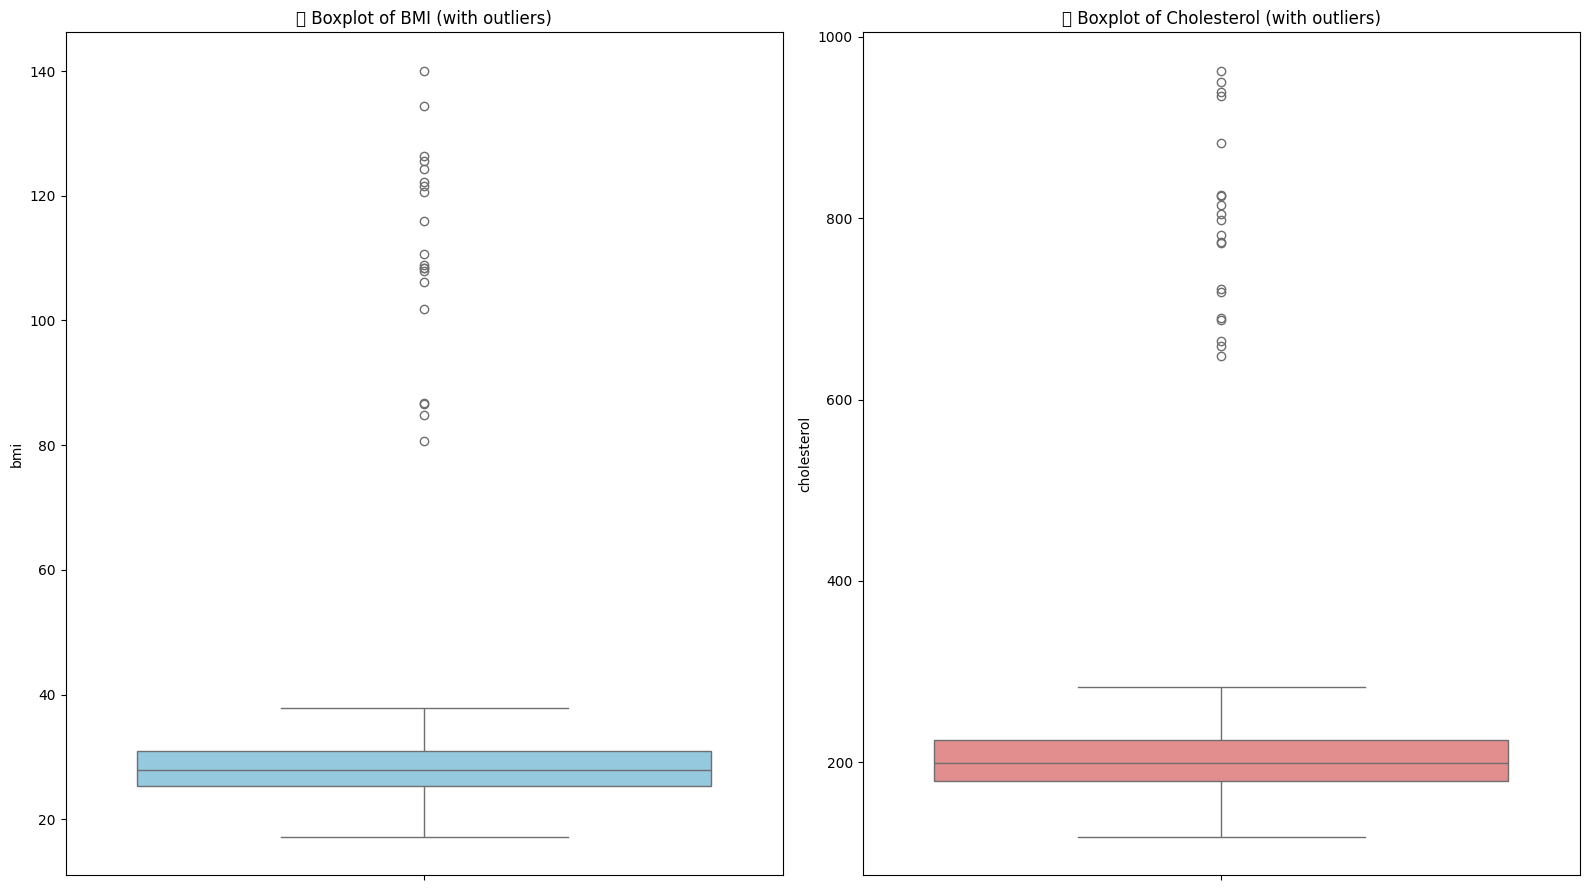

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))

# Boxplot for BMI
plt.subplot(1, 2, 1)
sns.boxplot(y=df_outliers['bmi'], color="skyblue")
plt.title("📦 Boxplot of BMI (with outliers)")

# Boxplot for Cholesterol
plt.subplot(1, 2, 2)
sns.boxplot(y=df_outliers['cholesterol'], color="lightcoral")
plt.title("📦 Boxplot of Cholesterol (with outliers)")

plt.tight_layout()
plt.show()


In [ ]:

# 🧼 IQR-based outlier removal function
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

# 🗂 Create cleaned copy with outliers removed
df_cleaned = df_outliers.copy()
df_cleaned['bmi'] = remove_outliers_iqr(df_cleaned['bmi'])
df_cleaned['cholesterol'] = remove_outliers_iqr(df_cleaned['cholesterol'])

# 📊 Build comparison DataFrame
comparison_stats = pd.DataFrame({
    'BMI Mean (With Outliers)': [df_outliers['bmi'].mean()],
    'BMI Mean (Without Outliers)': [df_cleaned['bmi'].mean()],
    'BMI Median (With Outliers)': [df_outliers['bmi'].median()],
    'BMI Median (Without Outliers)': [df_cleaned['bmi'].median()],
    'Chol Mean (With Outliers)': [df_outliers['cholesterol'].mean()],
    'Chol Mean (Without Outliers)': [df_cleaned['cholesterol'].mean()],
    'Chol Median (With Outliers)': [df_outliers['cholesterol'].median()],
    'Chol Median (Without Outliers)': [df_cleaned['cholesterol'].median()],
}).T
comparison_stats.columns = ['Value']
comparison_stats = comparison_stats.round(2)

# 📋 Display results
print("\n📊 Mean vs Median Comparison: With vs Without Outliers")
print(comparison_stats)


{}


📊 Mean vs Median Comparison: With vs Without Outliers
                                 Value
BMI Mean (With Outliers)         32.57
BMI Mean (Without Outliers)      27.66
BMI Median (With Outliers)       27.90
BMI Median (Without Outliers)    27.70
Chol Mean (With Outliers)       232.80
Chol Mean (Without Outliers)    197.80
Chol Median (With Outliers)     199.70
Chol Median (Without Outliers)  196.50
